In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [25]:
path_dataset = "/content/drive/MyDrive/Big Data Bu Ratih/Mobile phone price.csv"

In [26]:
df = pd.read_csv(path_dataset)

# Exploratory Data Analysis (EDA)

In [27]:
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [29]:
df.dtypes

Brand                     object
Model                     object
Storage                   object
RAM                       object
Screen Size (inches)      object
Camera (MP)               object
Battery Capacity (mAh)     int64
Price ($)                 object
dtype: object

##Data Cleaning

In [31]:
df = df.drop(['Screen Size (inches)', 'Camera (MP)', 'Battery Capacity (mAh)'], axis=1)
df.head(5)

,Brand,Model,Storage,RAM,Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,1199
2,OnePlus,9 Pro,128 GB,8 GB,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,279
4,Google,Pixel 6,128 GB,8 GB,799


In [32]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (31, 5)


In [33]:
df.shape

(407, 5)

In [34]:
df = df.drop_duplicates()
df.head(5)

,Brand,Model,Storage,RAM,Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,1199
2,OnePlus,9 Pro,128 GB,8 GB,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,279
4,Google,Pixel 6,128 GB,8 GB,799


In [35]:
df.count()

Brand        376
Model        376
Storage      376
RAM          376
Price ($)    376
dtype: int64

In [36]:
print(df.isnull().sum())

Brand        0
Model        0
Storage      0
RAM          0
Price ($)    0
dtype: int64


##Detecting Outliers With Boxplot

<Axes: xlabel='Price ($)'>

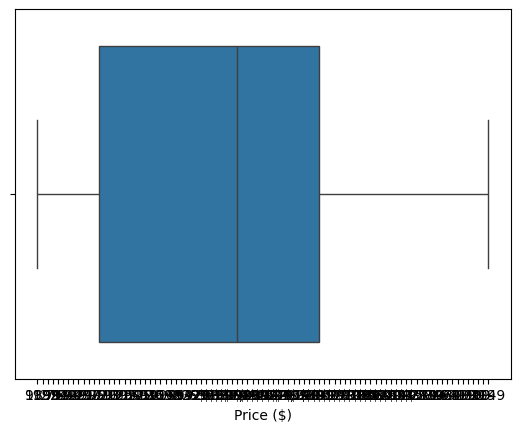

In [40]:
sns.boxplot(x=df['Price ($)'])


##Check data frequency using histogram

there are some row that cant be procces using histogram, so we convert to num

In [61]:
df['Price'] = df['Price ($)'].str.replace(r'\D', '', regex=True).astype(float)

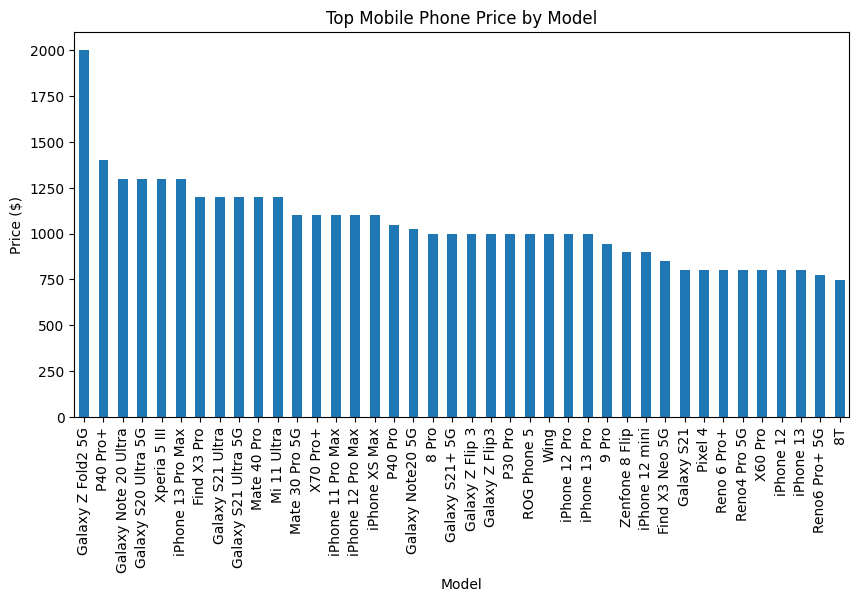

In [65]:
df.groupby('Model')['Price'].mean().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Top Mobile Phone Price by Model")
plt.ylabel('Price ($)')
plt.xlabel('Model')
plt.show()

##Check correlation between two variables using scatter plot

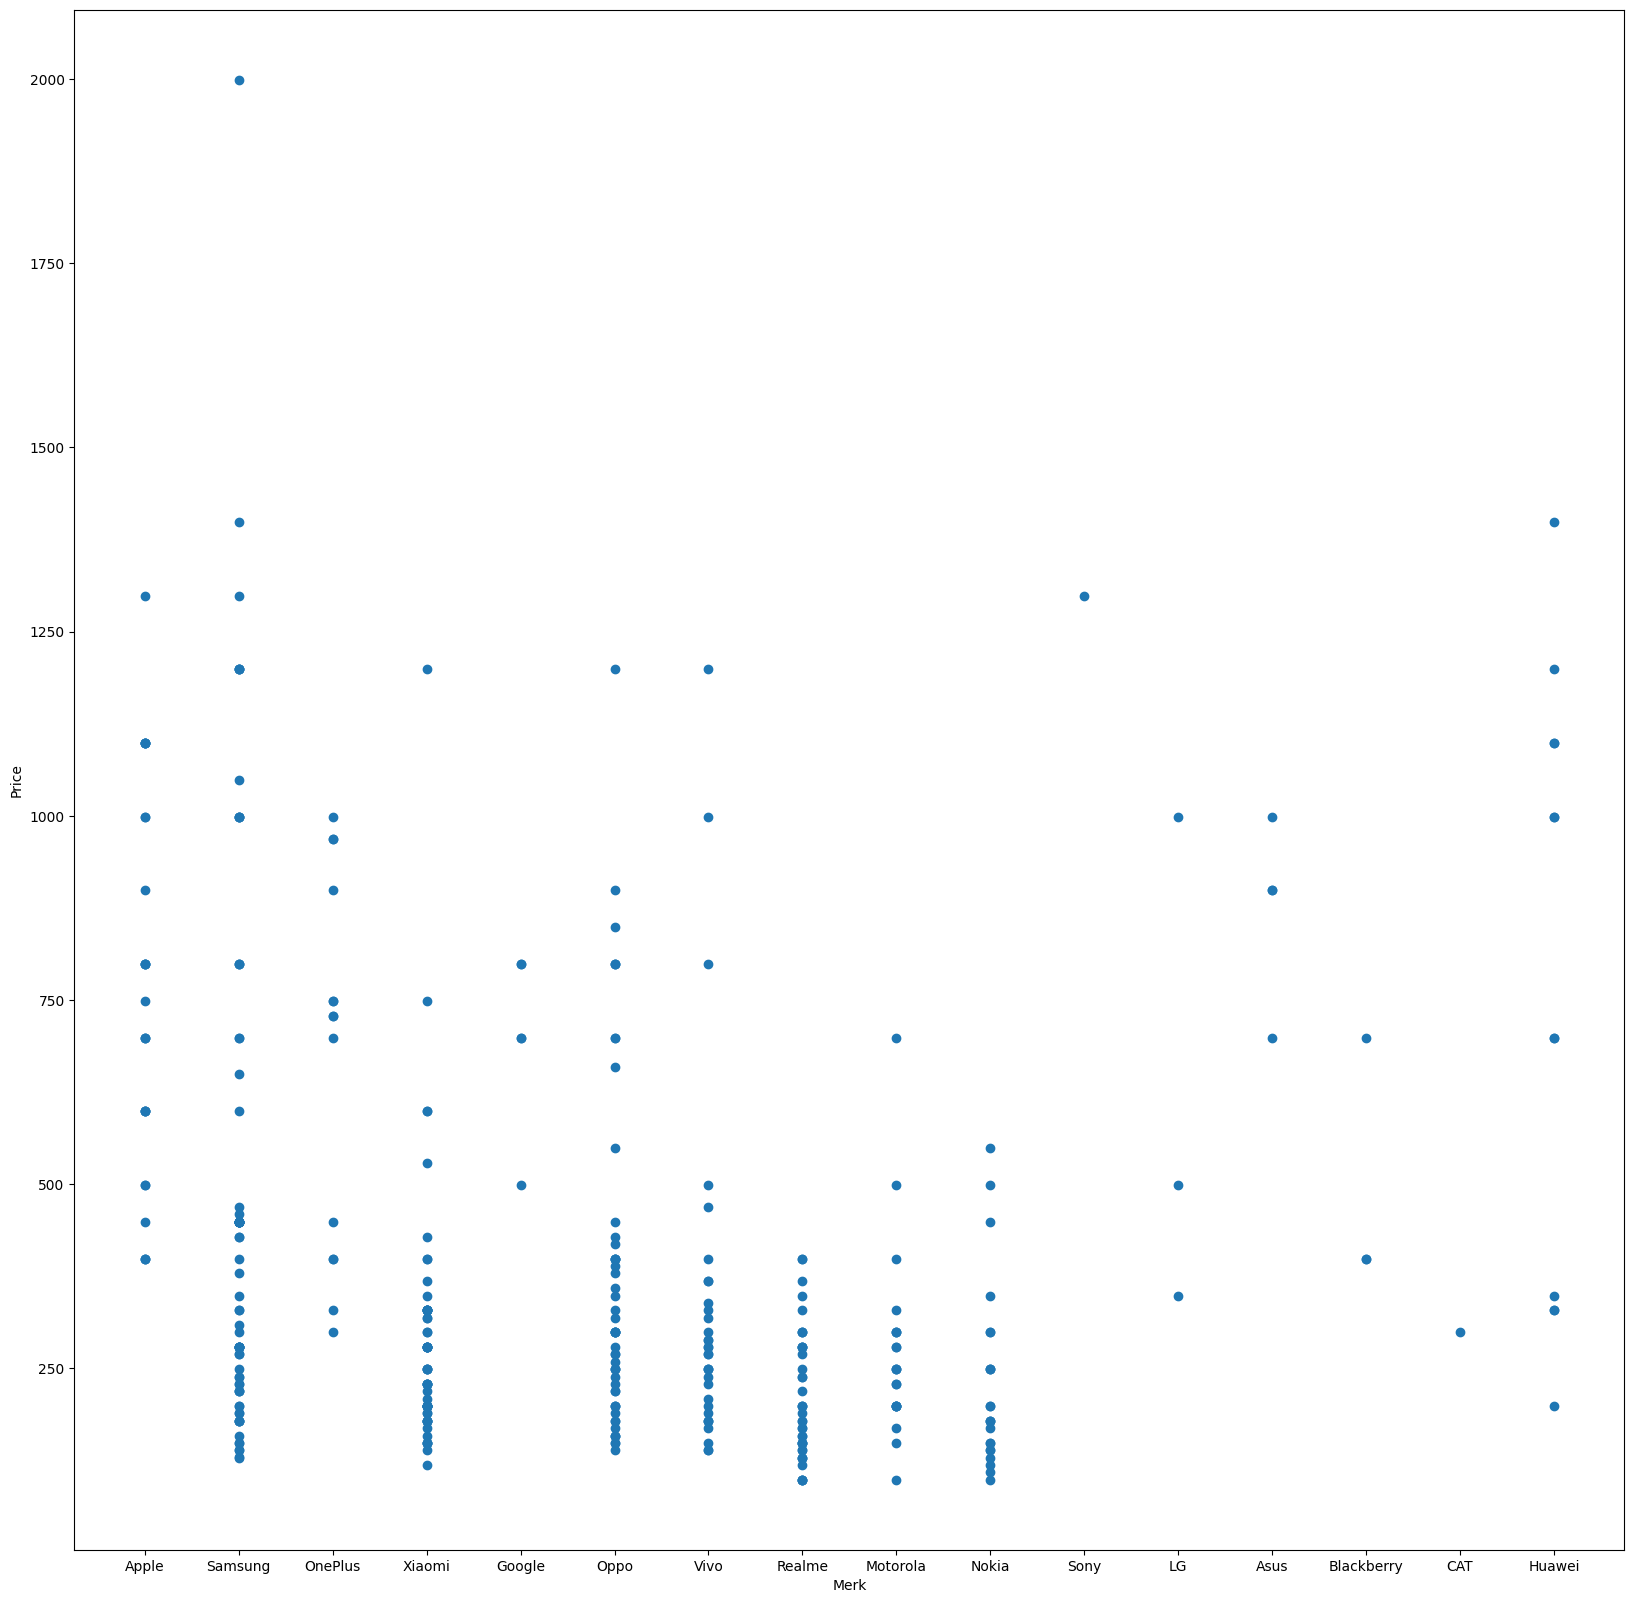

In [70]:
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(df['Brand'], df['Price'])
ax.set_xlabel('Merk')
ax.set_ylabel('Price')
plt.show()

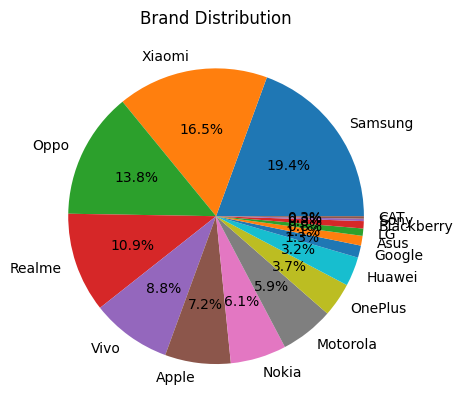

In [79]:
#Show dataset distribution

sentiment_counts = df['Brand'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')

plt.title('Brand Distribution')

plt.show()